In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [4]:
# read in CSV data
df = pd.read_csv('C:/Users/sweir/OneDrive/Desktop/Analysis Projects/Crude_Oil_Price_Projection/ML Resources/Cleaned_Crude_Oil_Dataset.csv')
df.head()

,Date,"Cushing, OK Crude Oil Future Contract ($/Bar.)",U.S. Field Production of Crude Oil (1k Bar.),Product Supplied of Crude Oil and Petroleum Products (1k Bar.),Gross Inputs to Refineries (1k Bar./Day),Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day),Operating Crude Oil Distillation Capacity (1k Bar./Day),Idle Crude Oil Distillation Capacity (1k Bar./Day),Percent Utilization of Refinery Operable Capacity,"Cushing, OK WTI Spot Price FOB ($/Bar.)"
0,1/1/1986,23.0,283248,498728,12583,15459,14639,820,81.4,22.9
1,2/1/1986,15.5,256855,453209,12068,15485,14538,947,77.9,15.5
2,3/1/1986,12.6,279413,504565,11759,15485,14517,968,75.9,12.6
3,4/1/1986,12.8,265917,478339,12603,15473,14550,923,81.5,12.8
4,5/1/1986,15.3,273964,495789,13314,15484,14805,679,86.0,15.4


In [5]:
# to convert the date column to type DATETIME
df['Date'] = pd.to_datetime(df['Date'])
df.tail()

,Date,"Cushing, OK Crude Oil Future Contract ($/Bar.)",U.S. Field Production of Crude Oil (1k Bar.),Product Supplied of Crude Oil and Petroleum Products (1k Bar.),Gross Inputs to Refineries (1k Bar./Day),Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day),Operating Crude Oil Distillation Capacity (1k Bar./Day),Idle Crude Oil Distillation Capacity (1k Bar./Day),Percent Utilization of Refinery Operable Capacity,"Cushing, OK WTI Spot Price FOB ($/Bar.)"
425,2021-06-01,71.4,338645,616115,16743,18128,17910,218,92.4,71.4
426,2021-07-01,72.4,351228,616714,16482,18129,17943,187,90.9,72.5
427,2021-08-01,67.7,347393,635828,16377,18130,17914,216,90.3,67.7
428,2021-09-01,71.5,324654,606706,15797,18130,15800,2331,87.1,71.6
429,2021-10-01,81.2,355670,616639,15581,18132,17133,999,85.9,81.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 10 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Date                                                             430 non-null    datetime64[ns]
 1   Cushing, OK Crude Oil Future Contract ($/Bar.)                   430 non-null    float64       
 2   U.S. Field Production of Crude Oil (1k Bar.)                     430 non-null    int64         
 3   Product Supplied of Crude Oil and Petroleum Products (1k Bar.)   430 non-null    int64         
 4   Gross Inputs to Refineries (1k Bar./Day)                         430 non-null    int64         
 5   Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day)  430 non-null    int64         
 6   Operating Crude Oil Distillation Capacity (1k Bar./Day)          430 non-null    i

# This time, we replace "Percent Utilization of Refinery Operable Capacity" with "Gross Inputs to Refineries (1k Bar./Day)"

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

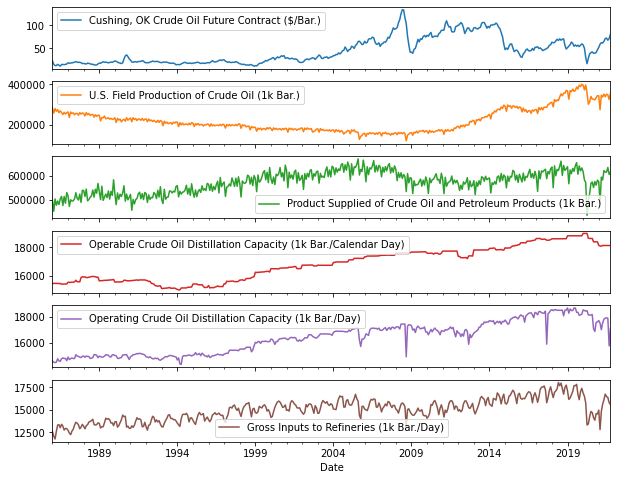

In [7]:
df.set_index('Date')[['Cushing, OK Crude Oil Future Contract ($/Bar.)', 'U.S. Field Production of Crude Oil (1k Bar.)', 'Product Supplied of Crude Oil and Petroleum Products (1k Bar.)', 'Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day)', 'Operating Crude Oil Distillation Capacity (1k Bar./Day)', 'Gross Inputs to Refineries (1k Bar./Day)']].plot(subplots=True)

In [8]:
# creating input DataFrame (Cushing, OK Crude Oil Future Contract ($/Bar.) is our Dependent Variable)
df_input=df[['Cushing, OK Crude Oil Future Contract ($/Bar.)', 'U.S. Field Production of Crude Oil (1k Bar.)', 'Product Supplied of Crude Oil and Petroleum Products (1k Bar.)', 'Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day)', 'Operating Crude Oil Distillation Capacity (1k Bar./Day)', 'Gross Inputs to Refineries (1k Bar./Day)']]
df_input

,"Cushing, OK Crude Oil Future Contract ($/Bar.)",U.S. Field Production of Crude Oil (1k Bar.),Product Supplied of Crude Oil and Petroleum Products (1k Bar.),Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day),Operating Crude Oil Distillation Capacity (1k Bar./Day),Gross Inputs to Refineries (1k Bar./Day)
0,23.0,283248,498728,15459,14639,12583
1,15.5,256855,453209,15485,14538,12068
2,12.6,279413,504565,15485,14517,11759
3,12.8,265917,478339,15473,14550,12603
4,15.3,273964,495789,15484,14805,13314
...,...,...,...,...,...,...
425,71.4,338645,616115,18128,17910,16743
426,72.4,351228,616714,18129,17943,16482
427,67.7,347393,635828,18130,17914,16377
428,71.5,324654,606706,18130,15800,15797


In [9]:
df_input.describe()

,"Cushing, OK Crude Oil Future Contract ($/Bar.)",U.S. Field Production of Crude Oil (1k Bar.),Product Supplied of Crude Oil and Petroleum Products (1k Bar.),Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day),Operating Crude Oil Distillation Capacity (1k Bar./Day),Gross Inputs to Refineries (1k Bar./Day)
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,44.572326,220299.755814,574218.216279,16841.562791,16419.065116,15007.913953
std,28.698790,59441.362987,45528.327895,1161.536555,1210.491590,1238.984141
min,11.300000,119208.000000,436455.000000,15028.000000,14375.000000,11759.000000
25%,19.900000,173878.250000,537078.500000,15686.250000,15117.000000,14049.250000
50%,33.050000,202056.500000,579533.000000,16764.000000,16564.000000,15093.500000
75%,63.500000,255772.250000,610163.500000,17736.000000,17227.500000,15803.750000
max,134.000000,400219.000000,671648.000000,18976.000000,18698.000000,18041.000000


# This model uses a MinMaxScaler

In [10]:
scaler = MinMaxScaler()
df_input_scaled = scaler.fit_transform(df_input)

In [11]:
df_input_scaled

array([[0.09535452, 0.58374939, 0.26477404, 0.1091692 , 0.0610687 ,
        0.13116842],
       [0.03422983, 0.4898278 , 0.07123511, 0.11575481, 0.0377053 ,
        0.04918816],
       [0.01059495, 0.57010224, 0.28959195, 0.11575481, 0.03284756,
        0.        ],
       ...,
       [0.4596577 , 0.81201448, 0.84769955, 0.78571429, 0.81864446,
        0.73511621],
       [0.49062755, 0.73109594, 0.72387784, 0.78571429, 0.3296322 ,
        0.64278892],
       [0.56968215, 0.84146884, 0.76611124, 0.78622087, 0.63798288,
        0.60840497]])

In [12]:
features=df_input_scaled
target=df_input_scaled[:,0]

In [13]:
TimeseriesGenerator(features, target, length=12, sampling_rate=1, batch_size=3)[0]

(array([[[0.09535452, 0.58374939, 0.26477404, 0.1091692 , 0.0610687 ,
          0.13116842],
         [0.03422983, 0.4898278 , 0.07123511, 0.11575481, 0.0377053 ,
          0.04918816],
         [0.01059495, 0.57010224, 0.28959195, 0.11575481, 0.03284756,
          0.        ],
         [0.01222494, 0.52207565, 0.17808353, 0.1127153 , 0.04048115,
          0.13435212],
         [0.03259984, 0.55071154, 0.25227792, 0.11550152, 0.09946796,
          0.24753263],
         [0.01711491, 0.49639338, 0.19144702, 0.11068896, 0.06338191,
          0.25278574],
         [0.00244499, 0.53108241, 0.29362694, 0.11322188, 0.05366644,
          0.19898122],
         [0.03096985, 0.49952493, 0.33466982, 0.10182371, 0.0999306 ,
          0.25994906],
         [0.02933985, 0.46487504, 0.17353408, 0.10309017, 0.11450382,
          0.22795288],
         [0.02933985, 0.50452118, 0.33257367, 0.10309017, 0.10455702,
          0.15822986],
         [0.03178484, 0.47388181, 0.21334819, 0.10435664, 0.10640759,


In [14]:
#defining train_test_splits
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle = False)

In [15]:
x_train.shape

(344, 6)

In [16]:
x_test.shape

(86, 6)

# Batch Size 4, window length 12

In [17]:
#defining training and testing generators
window_length=12
batch_size=4
num_features=6
training_generator = TimeseriesGenerator(x_train, y_train, length=window_length, sampling_rate=1, batch_size=batch_size)
testing_generator = TimeseriesGenerator(x_test, y_test, length=window_length, sampling_rate=1, batch_size=batch_size)

In [18]:
training_generator[0]

(array([[[0.09535452, 0.58374939, 0.26477404, 0.1091692 , 0.0610687 ,
          0.13116842],
         [0.03422983, 0.4898278 , 0.07123511, 0.11575481, 0.0377053 ,
          0.04918816],
         [0.01059495, 0.57010224, 0.28959195, 0.11575481, 0.03284756,
          0.        ],
         [0.01222494, 0.52207565, 0.17808353, 0.1127153 , 0.04048115,
          0.13435212],
         [0.03259984, 0.55071154, 0.25227792, 0.11550152, 0.09946796,
          0.24753263],
         [0.01711491, 0.49639338, 0.19144702, 0.11068896, 0.06338191,
          0.25278574],
         [0.00244499, 0.53108241, 0.29362694, 0.11322188, 0.05366644,
          0.19898122],
         [0.03096985, 0.49952493, 0.33466982, 0.10182371, 0.0999306 ,
          0.25994906],
         [0.02933985, 0.46487504, 0.17353408, 0.10309017, 0.11450382,
          0.22795288],
         [0.02933985, 0.50452118, 0.33257367, 0.10309017, 0.10455702,
          0.15822986],
         [0.03178484, 0.47388181, 0.21334819, 0.10435664, 0.10640759,


# Using tanh activation function in this run

In [19]:
# creating the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (window_length, num_features), return_sequences=True))
model.add(tf.keras.layers.Activation('tanh'))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.Activation('tanh'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 128)           69120     
                                                                 
 activation (Activation)     (None, 12, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 12, 128)           131584    
                                                                 
 activation_1 (Activation)   (None, 12, 128)           0         
                                                                 
 dropout (Dropout)           (None, 12, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

# Dropping Learning Rate even Further, to .00001

In [21]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                   patience=4,
                                                   mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(learning_rate=0.001),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit(training_generator, epochs=50,
                     validation_data=testing_generator,
                     shuffle=False,
                     callbacks=[early_stopping])

Epoch 1/50
83/83 [==============================] - 7s 31ms/step - loss: 0.0222 - mean_absolute_error: 0.0923 - val_loss: 0.3552 - val_mean_absolute_error: 0.5867
Epoch 2/50
83/83 [==============================] - 2s 18ms/step - loss: 0.0286 - mean_absolute_error: 0.1208 - val_loss: 0.2591 - val_mean_absolute_error: 0.4986
Epoch 3/50
83/83 [==============================] - 1s 18ms/step - loss: 0.0246 - mean_absolute_error: 0.1155 - val_loss: 0.2374 - val_mean_absolute_error: 0.4745
Epoch 4/50
83/83 [==============================] - 2s 18ms/step - loss: 0.0184 - mean_absolute_error: 0.1091 - val_loss: 0.2190 - val_mean_absolute_error: 0.4548
Epoch 5/50
83/83 [==============================] - 2s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.1054 - val_loss: 0.1936 - val_mean_absolute_error: 0.4267
Epoch 6/50
83/83 [==============================] - 2s 20ms/step - loss: 0.0205 - mean_absolute_error: 0.1133 - val_loss: 0.1268 - val_mean_absolute_error: 0.3393
Epoch 7/50
83/83 [====

In [22]:
model.evaluate(testing_generator, verbose=0)

[0.011069713160395622, 0.08271186053752899]

In [23]:
predictions=model.predict(testing_generator)

In [24]:
predictions.shape[0]

74

In [25]:
predictions

array([[0.37904313],
       [0.35034102],
       [0.3364077 ],
       [0.32526833],
       [0.3237394 ],
       [0.3178229 ],
       [0.3052939 ],
       [0.30582145],
       [0.3056394 ],
       [0.30923766],
       [0.31590846],
       [0.3296128 ],
       [0.34294465],
       [0.3493841 ],
       [0.35984606],
       [0.3695426 ],
       [0.3859227 ],
       [0.39934668],
       [0.41530588],
       [0.43524948],
       [0.4499108 ],
       [0.45787916],
       [0.45714992],
       [0.45673224],
       [0.456113  ],
       [0.44266468],
       [0.430356  ],
       [0.4228992 ],
       [0.41698644],
       [0.4084199 ],
       [0.39637992],
       [0.405045  ],
       [0.41298953],
       [0.4309351 ],
       [0.44660828],
       [0.46161464],
       [0.46827328],
       [0.48399433],
       [0.48476103],
       [0.47819144],
       [0.46682402],
       [0.44656408],
       [0.41221586],
       [0.405991  ],
       [0.39609548],
       [0.39364514],
       [0.3925595 ],
       [0.391

In [26]:
y_test

array([0.66585167, 0.59494703, 0.52567237, 0.39119804, 0.29339853,
       0.32110839, 0.29828851, 0.35289324, 0.39201304, 0.39527302,
       0.32273839, 0.25753871, 0.27872861, 0.28524857, 0.25753871,
       0.21189894, 0.16707416, 0.15729421, 0.21760391, 0.24286879,
       0.28932355, 0.30562347, 0.27302363, 0.27302363, 0.27628362,
       0.31458843, 0.28198859, 0.33333333, 0.33659332, 0.34392828,
       0.31295844, 0.32436838, 0.30317848, 0.27628362, 0.28850856,
       0.2999185 , 0.31458843, 0.32925835, 0.36837816, 0.3797881 ,
       0.42542787, 0.41483293, 0.4205379 , 0.44824776, 0.47758761,
       0.45639772, 0.48410758, 0.4604727 , 0.4792176 , 0.48492258,
       0.36919315, 0.30480848, 0.32844336, 0.35615322, 0.38223309,
       0.42868786, 0.40423798, 0.35370823, 0.37652812, 0.35452323,
       0.37245314, 0.34800326, 0.37326813, 0.39527302, 0.37652812,
       0.3194784 , 0.15566422, 0.04400978, 0.1401793 , 0.2200489 ,
       0.2404238 , 0.25346373, 0.23064385, 0.23064385, 0.24286

In [27]:
x_test

array([[0.66585167, 0.54575444, 0.59378893, 0.71099291, 0.76405274,
        0.73209169],
       [0.59494703, 0.59778799, 0.74094042, 0.71504559, 0.71501272,
        0.62098058],
       [0.52567237, 0.5714545 , 0.6180286 , 0.70491388, 0.76266482,
        0.73352436],
       [0.39119804, 0.63083652, 0.71369046, 0.70491388, 0.75410594,
        0.79465138],
       [0.29339853, 0.61082306, 0.68456119, 0.74442756, 0.78487162,
        0.63801337],
       [0.32110839, 0.52278025, 0.48646856, 0.74012158, 0.75618783,
        0.61700096],
       [0.29828851, 0.63282932, 0.6945785 , 0.74012158, 0.71385612,
        0.6556829 ],
       [0.35289324, 0.6068339 , 0.60108932, 0.74316109, 0.7203331 ,
        0.75803884],
       [0.39201304, 0.62088317, 0.69107499, 0.74316109, 0.79666898,
        0.77252467],
       [0.39527302, 0.57484938, 0.67576416, 0.76697062, 0.80916031,
        0.82219039],
       [0.32273839, 0.6177872 , 0.79605686, 0.77735562, 0.82974786,
        0.86373766],
       [0.25753871, 0

In [28]:
x_test[:,1:][window_length:]

array([[0.58784176, 0.62340291, 0.78774063, 0.84501504, 0.74307545],
       [0.61279452, 0.71050159, 0.78647416, 0.82442748, 0.62591531],
       [0.57210216, 0.5812588 , 0.79989868, 0.80615313, 0.78382681],
       [0.59898011, 0.72710923, 0.79989868, 0.84871617, 0.80913722],
       [0.59085587, 0.65689455, 0.83308004, 0.87670599, 0.72238141],
       [0.51112946, 0.59075313, 0.83308004, 0.86051353, 0.70359758],
       [0.57829765, 0.74786239, 0.83358663, 0.85565579, 0.72078956],
       [0.52280516, 0.61197825, 0.83358663, 0.74739764, 0.71060172],
       [0.55006032, 0.69162348, 0.83358663, 0.85820032, 0.7510347 ],
       [0.50159958, 0.6739869 , 0.86246201, 0.88040712, 0.802929  ],
       [0.5311607 , 0.74793467, 0.86246201, 0.90353921, 0.83428844],
       [0.53422464, 0.81487969, 0.86246201, 0.91094148, 0.830468  ],
       [0.4876713 , 0.66663549, 0.86828774, 0.91394865, 0.78446355],
       [0.54678287, 0.73876774, 0.87208713, 0.8801758 , 0.64056033],
       [0.52605414, 0.65530862, 0.

In [29]:
df_predictions2=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][window_length:])],axis=1)

In [30]:
df_predictions2

,0,0,1,2,3,4
0,0.379043,0.587842,0.623403,0.787741,0.845015,0.743075
1,0.350341,0.612795,0.710502,0.786474,0.824427,0.625915
2,0.336408,0.572102,0.581259,0.799899,0.806153,0.783827
3,0.325268,0.598980,0.727109,0.799899,0.848716,0.809137
4,0.323739,0.590856,0.656895,0.833080,0.876706,0.722381
...,...,...,...,...,...,...
69,0.459485,0.780884,0.763883,0.785208,0.817719,0.793378
70,0.446051,0.825662,0.766430,0.785461,0.825353,0.751831
71,0.442701,0.812014,0.847700,0.785714,0.818644,0.735116
72,0.433762,0.731096,0.723878,0.785714,0.329632,0.642789


In [31]:
reverse_transformation=scaler.inverse_transform(df_predictions2)

In [32]:
reverse_transformation

array([[5.78085923e+01, 2.84398000e+05, 5.83075000e+05, 1.81380000e+04,
        1.80280000e+04, 1.64270000e+04],
       [5.42868434e+01, 2.91410000e+05, 6.03560000e+05, 1.81330000e+04,
        1.79390000e+04, 1.56910000e+04],
       [5.25772237e+01, 2.79975000e+05, 5.73163000e+05, 1.81860000e+04,
        1.78600000e+04, 1.66830000e+04],
       [5.12104239e+01, 2.87528000e+05, 6.07466000e+05, 1.81860000e+04,
        1.80440000e+04, 1.68420000e+04],
       [5.10228255e+01, 2.85245000e+05, 5.90952000e+05, 1.83170000e+04,
        1.81650000e+04, 1.62970000e+04],
       [5.02968702e+01, 2.62841000e+05, 5.75396000e+05, 1.83170000e+04,
        1.80950000e+04, 1.61790000e+04],
       [4.87595600e+01, 2.81716000e+05, 6.12347000e+05, 1.83190000e+04,
        1.80740000e+04, 1.62870000e+04],
       [4.88242917e+01, 2.66122000e+05, 5.80388000e+05, 1.83190000e+04,
        1.76060000e+04, 1.62230000e+04],
       [4.88019527e+01, 2.73781000e+05, 5.99120000e+05, 1.83190000e+04,
        1.80850000e+04, 

In [33]:
df_final=df_input[predictions.shape[0]*-1:]

In [34]:
df_final.count()

Cushing, OK Crude Oil Future Contract ($/Bar.)                     74
U.S. Field Production of Crude Oil (1k Bar.)                       74
Product Supplied of Crude Oil and Petroleum Products (1k Bar.)     74
Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day)    74
Operating Crude Oil Distillation Capacity (1k Bar./Day)            74
Gross Inputs to Refineries (1k Bar./Day)                           74
dtype: int64

In [35]:
df_final['predicted_wti_futures_price']=reverse_transformation[:,0]

C:\Users\sweir\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df_final

,"Cushing, OK Crude Oil Future Contract ($/Bar.)",U.S. Field Production of Crude Oil (1k Bar.),Product Supplied of Crude Oil and Petroleum Products (1k Bar.),Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day),Operating Crude Oil Distillation Capacity (1k Bar./Day),Gross Inputs to Refineries (1k Bar./Day),predicted_wti_futures_price
356,45.5,284398,583075,18138,18028,16427,57.808592
357,46.3,291410,603560,18133,17939,15691,54.286843
358,42.9,279975,573163,18186,17860,16683,52.577224
359,37.3,287528,607466,18186,18044,16842,51.210424
360,31.8,285245,590952,18317,18165,16297,51.022826
...,...,...,...,...,...,...,...
425,71.4,338645,616115,18128,17910,16743,67.678802
426,72.4,351228,616714,18129,17943,16482,66.030403
427,67.7,347393,635828,18130,17914,16377,65.619443
428,71.5,324654,606706,18130,15800,15797,64.522595


<AxesSubplot:>

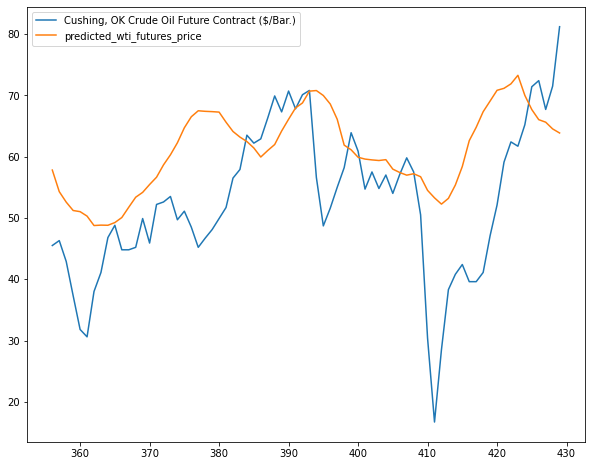

In [37]:
df_final[['Cushing, OK Crude Oil Future Contract ($/Bar.)', 'predicted_wti_futures_price']].plot()